# WITH PANDAS AND MATPLOTLIB

In [39]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [40]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [41]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [42]:
total = kill.groupby("gender")["id"].count().sort_values(ascending=False)
total

gender
M    2428
F     107
Name: id, dtype: int64

In [43]:
gndr = total.index
gndr

Index(['M', 'F'], dtype='object', name='gender')

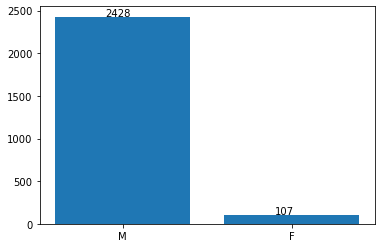

In [44]:
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(gndr, total)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+1.5));

In [45]:
# with matplotlib


## 2: Plot 7 most common kill weapons

In [46]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [47]:
comm_7 = kill.armed.value_counts(dropna=False).head(7)
comm_7

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [48]:
weapons = comm_7.index
weapons

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'unknown weapon'],
      dtype='object')

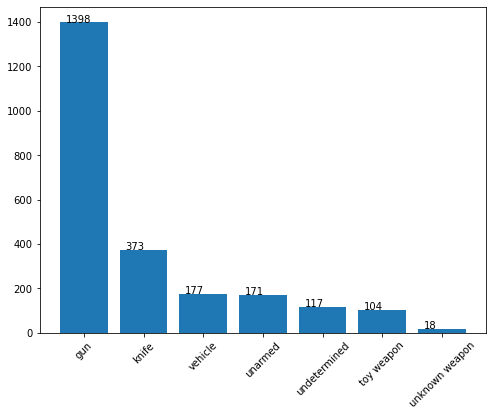

In [49]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(weapons, comm_7)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1))

plt.xticks(rotation=45);
    

In [50]:
# with matplotlib


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [51]:
kill_copy1=kill.copy()
kill_copy1.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [52]:
kill_copy1["Below_Above_25"] = kill_copy1["age"].apply(lambda x: "Above25" if x>25 else "Below25")
kill_copy1.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Below_Above_25
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Above25


In [53]:
age_count = kill_copy1.Below_Above_25.value_counts()
age_count

Above25    1905
Below25     630
Name: Below_Above_25, dtype: int64

In [54]:
categories = age_count.index
categories

Index(['Above25', 'Below25'], dtype='object')

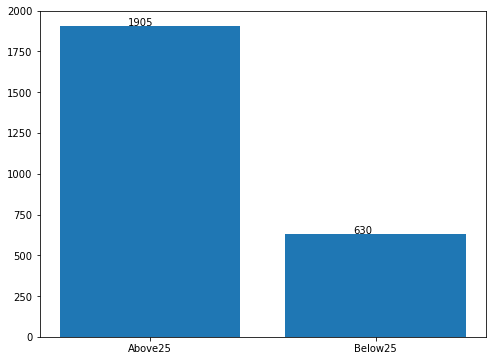

In [55]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(categories, age_count)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+1.7));

In [56]:
# with matplotlib


## 4: Plot number of killed poeple by race

In [57]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [58]:
race = kill.race.value_counts()
race

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [59]:
race_cat = race.index
race_cat

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

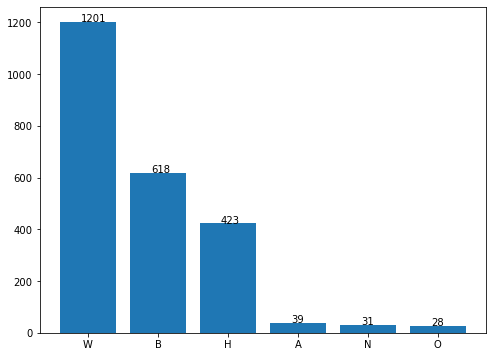

In [60]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(race_cat, race)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+1.7));

In [61]:
# with matplotlib


## 5: Killed People According to Races (Pie Chart)

In [62]:
race_pie = kill.race.value_counts(dropna=False)
race_pie

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

In [64]:
race_cat = race_pie.index
race_cat

Index(['W', 'B', 'H', nan, 'A', 'N', 'O'], dtype='object')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [65]:
kill_nr = kill[kill["race"].notna()]
kill_nr.shape

(2340, 14)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [71]:
race_kill_pie = kill_nr.race.value_counts(dropna=False)
race_kill_pie

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [100]:
race_cat_n = race_kill_pie.index
race_cat_n

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

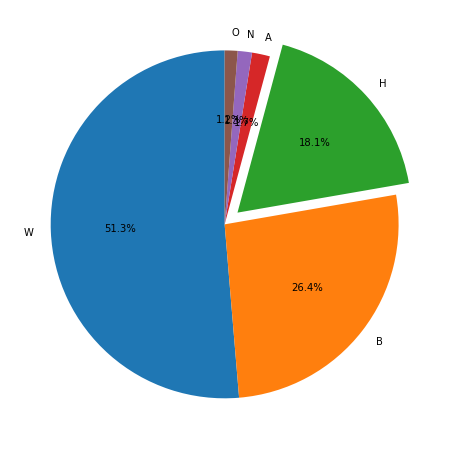

In [107]:
explode=(0, 0, 0.1, 0, 0, 0)
labels = race_cat_n

fig1, ax1 = plt.subplots(figsize=(16,8))
ax1.pie(race_kill_pie, explode=explode, labels=labels, autopct='%1.1f%%',
        startangle=90)

plt.show()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

array([1168,  592,  401,   36,   29,   28])

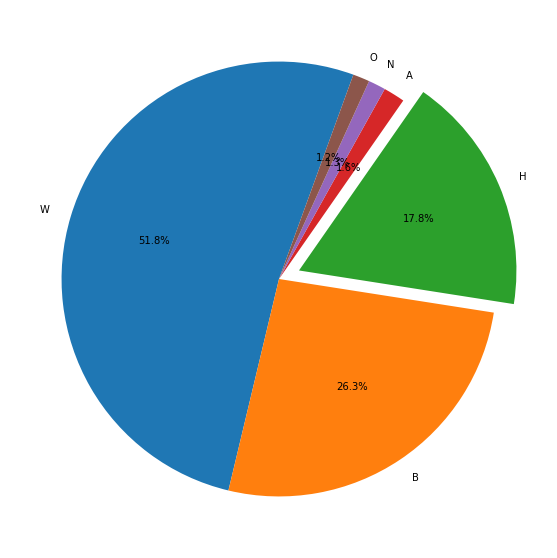

In [ ]:
# matplotlib

